<a href="https://colab.research.google.com/github/bpunar/PANDAS-EXERCISES/blob/main/Pandas_Recap_Session1_(Apply_Map_Applymap_Transform).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

![image.png](https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png)

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">Pandas Recap Lesson, US Session-01</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">Map(), Apply() & Applymap()</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">CONTENT</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [THE MAP() METHOD](#1)
* [THE APPLY() METHOD](#2)
* [THE APPLYMAP() METHOD](#3)
* [COMBINING LAMBDA FUNCTION WITH APPLY()](#4)
* [THE TRANSFORM() METHOD](#5)
* [THE APPLICATION OF TRANSFORM() & APPLY() METHODS WITH GROUPBY() TO REAL WORLD DATASET](#6)
* [The End of the Recap Session](#7)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

When working with Seaborn, we can either use one of the built-in datasets that Seaborn offers or we can load a Pandas DataFrame. Seaborn is part of the PyData stack hence accepts Pandas' data structures. Let us begin by importing few built-in datasets but before that we shall import few other libraries as well that our Seaborn would depend upon:

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

import warnings
warnings.filterwarnings('ignore') 

np.random.seed(42)

In [ ]:
# from sklearn.datasets import load_iris

# data = load_iris()
# features = pd.DataFrame(data = data['data'], columns=data['feature_names'])
# features.head() #glance at the data 

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
df0 = sns.load_dataset("iris")
df = df0.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Iris dataset actually has 50 samples from each of three species of Iris flower (Setosa, Virginica and Versicolor). Four (4) features were measured (in centimeters) from each sample: Length and Width of the Sepals and Petals For More Information you can visit [SOURCE01](https://en.wikipedia.org/wiki/Iris_flower_data_set), [SOURCE02](https://github.com/mwaskom/seaborn-data) & [SOURCE03](http://seaborn.pydata.org/).

Let us try to have a summarized view of this dataset:

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**.describe()** is a very useful method in Pandas as it generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset distribution, excluding NaN values. 

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Without getting in-depth into analysis here, let us try to plot something simple from this dataset:

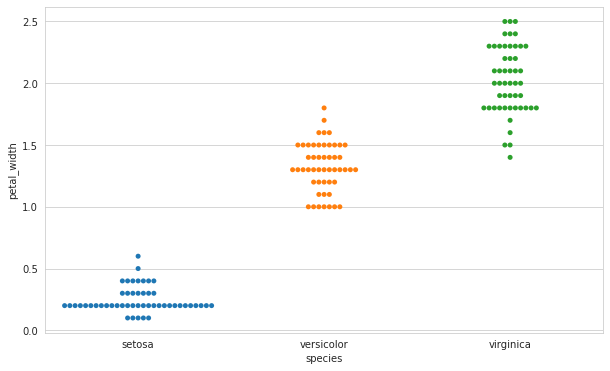

In [7]:
plt.figure(figsize=(10, 6))

sns.set_style("whitegrid")
sns.swarmplot(x="species", y="petal_width", data=df);

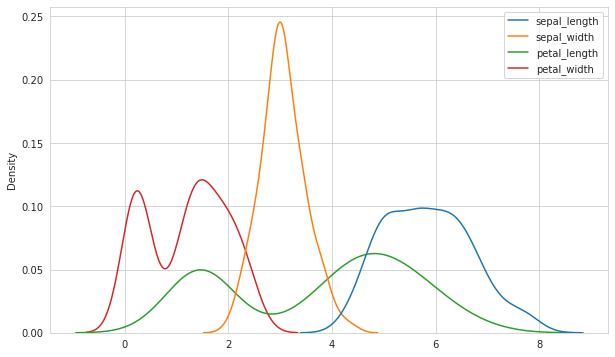

In [8]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df);

In [9]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


![image.png](https://i.ibb.co/rMp64hf/apply-map-applymap.png)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">THE MAP() METHOD</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**Map()**

The map() method **only** works on panda series where different types of operation can be applied to the items in the series.

**How does map() function work?**

When you apply the map(function) method on a series, the map() function takes each element in the series and applies the function to it, and returns the transformed series.

**``EXAMPLE:`` Let's assume that we would like to change the measurement of the sepal length from cm to mm.**

In [10]:
# this is what we can do with the map function and put a function call cm_to_mm inside. 

def cm_to_mm(cm):
    mm = cm * 10
    return mm

df['sepal length (mm)'] = df['sepal_length'].map(cm_to_mm) # this way, we have used this function on this pandas series 

In [11]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal length (mm)
0,5.1,3.5,1.4,0.2,setosa,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0
2,4.7,3.2,1.3,0.2,setosa,47.0


In [ ]:
# df.drop("sepal length (mm)", axis=1, inplace=True)

In [12]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal length (mm)
0,5.1,3.5,1.4,0.2,setosa,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0
2,4.7,3.2,1.3,0.2,setosa,47.0


**How to reorder columns in a Pandas DataFrame?**

In [13]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'sepal length (mm)'],
      dtype='object')

In [14]:
# 1st Method

column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal length (mm)', 'species']

df = df.reindex(columns=column_names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal length (mm),species
0,5.1,3.5,1.4,0.2,51.0,setosa
1,4.9,3.0,1.4,0.2,49.0,setosa
2,4.7,3.2,1.3,0.2,47.0,setosa
3,4.6,3.1,1.5,0.2,46.0,setosa
4,5.0,3.6,1.4,0.2,50.0,setosa


In [15]:
# 2nd Method

a = df['sepal_length'].map(cm_to_mm).to_list()
a

[51.0,
 49.0,
 47.0,
 46.0,
 50.0,
 54.0,
 46.0,
 50.0,
 44.0,
 49.0,
 54.0,
 48.0,
 48.0,
 43.0,
 58.0,
 57.0,
 54.0,
 51.0,
 57.0,
 51.0,
 54.0,
 51.0,
 46.0,
 51.0,
 48.0,
 50.0,
 50.0,
 52.0,
 52.0,
 47.0,
 48.0,
 54.0,
 52.0,
 55.0,
 49.0,
 50.0,
 55.0,
 49.0,
 44.0,
 51.0,
 50.0,
 45.0,
 44.0,
 50.0,
 51.0,
 48.0,
 51.0,
 46.0,
 53.0,
 50.0,
 70.0,
 64.0,
 69.0,
 55.0,
 65.0,
 57.0,
 63.0,
 49.0,
 66.0,
 52.0,
 50.0,
 59.0,
 60.0,
 61.0,
 56.0,
 67.0,
 56.0,
 58.0,
 62.0,
 56.0,
 59.0,
 61.0,
 63.0,
 61.0,
 64.0,
 66.0,
 68.0,
 67.0,
 60.0,
 57.0,
 55.0,
 55.0,
 58.0,
 60.0,
 54.0,
 60.0,
 67.0,
 63.0,
 56.0,
 55.0,
 55.0,
 61.0,
 58.0,
 50.0,
 56.0,
 57.0,
 57.0,
 62.0,
 51.0,
 57.0,
 63.0,
 58.0,
 71.0,
 63.0,
 65.0,
 76.0,
 49.0,
 73.0,
 67.0,
 72.0,
 65.0,
 64.0,
 68.0,
 57.0,
 58.0,
 64.0,
 65.0,
 77.0,
 77.0,
 60.0,
 69.0,
 56.0,
 77.0,
 63.0,
 67.0,
 72.0,
 62.0,
 61.0,
 64.0,
 72.0,
 74.0,
 79.0,
 64.0,
 63.0,
 61.0,
 77.0,
 63.0,
 64.0,
 60.0,
 69.0,
 67.0,
 69.0,
 58.0,

In [16]:
df.insert(4, 'sample_sepal_length (mm)', a)

In [17]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,sample_sepal_length (mm),sepal length (mm),species
0,5.1,3.5,1.4,0.2,51.0,51.0,setosa
1,4.9,3.0,1.4,0.2,49.0,49.0,setosa
2,4.7,3.2,1.3,0.2,47.0,47.0,setosa


In [18]:
df.drop("sample_sepal_length (mm)", axis=1, inplace=True)

In [19]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,sepal length (mm),species
0,5.1,3.5,1.4,0.2,51.0,setosa
1,4.9,3.0,1.4,0.2,49.0,setosa
2,4.7,3.2,1.3,0.2,47.0,setosa


**what if we want to do it on two columns?**

In [20]:
# df[['sepal_width',"petal_length", "petal_width"]].map(cm_to_mm)

# Gives "AttributeError: 'DataFrame' object has no attribute 'map'"

In this case, ``map()`` method cannot be used as it is supposed to operate only over Series objects (i.e. over single columns). This is when we will need the ``apply()`` function.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">THE APPLY() METHOD</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``The apply()``** method works on panda series and data frames with a variety of functions easily applied depending on the datatype.

**How does apply() function work?**

Similar to ``map()``, when you use the ``apply()`` method on a series or a data frame, the function takes each element in the series and apply the function onto the element, then returns the transformed series or data frame.

**``EXAMPLE:`` Now let's assume that we would like to change the measurement of the sepal width, petal length & petal width from cm to mm.**

In [21]:
# df.drop(['sepal width (mm)',"petal length (mm)", "petal width (mm)"], axis=1, inplace=True)

In [22]:
df[['sepal width (mm)',"petal length (mm)", "petal width (mm)"]] = df[['sepal_width',"petal_length", "petal_width"]].apply(cm_to_mm)

In [23]:
df

,sepal_length,sepal_width,petal_length,petal_width,sepal length (mm),species,sepal width (mm),petal length (mm),petal width (mm)
0,5.1,3.5,1.4,0.2,51.0,setosa,35.0,14.0,2.0
1,4.9,3.0,1.4,0.2,49.0,setosa,30.0,14.0,2.0
2,4.7,3.2,1.3,0.2,47.0,setosa,32.0,13.0,2.0
3,4.6,3.1,1.5,0.2,46.0,setosa,31.0,15.0,2.0
4,5.0,3.6,1.4,0.2,50.0,setosa,36.0,14.0,2.0
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,67.0,virginica,30.0,52.0,23.0
146,6.3,2.5,5.0,1.9,63.0,virginica,25.0,50.0,19.0
147,6.5,3.0,5.2,2.0,65.0,virginica,30.0,52.0,20.0
148,6.2,3.4,5.4,2.3,62.0,virginica,34.0,54.0,23.0


In [24]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'sepal length (mm)', 'species', 'sepal width (mm)', 'petal length (mm)',
       'petal width (mm)'],
      dtype='object')

In [25]:
columnsTitles = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal length (mm)', 
                 'sepal width (mm)', 'petal length (mm)', 'petal width (mm)', 'species']

df = df.reindex(columns=columnsTitles)
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,sepal length (mm),sepal width (mm),petal length (mm),petal width (mm),species
0,5.1,3.5,1.4,0.2,51.0,35.0,14.0,2.0,setosa
1,4.9,3.0,1.4,0.2,49.0,30.0,14.0,2.0,setosa
2,4.7,3.2,1.3,0.2,47.0,32.0,13.0,2.0,setosa


And ``apply()`` works!! But, there is just way too much typing for me with all the variable names and names and names and names… And what if there are 15 columns in your data frame, or 50… OR 500!!!

The next question is, what if we want to change the entire data frame? There are two ways we can do this.<br>
- with apply().
- with applymap().

Let us dive into ``applymap( )``, which is our lifesaver today!!

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">THE APPLYMAP() METHOD</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The ``applymap()`` method works on the entire pandas data frame where the input function is applied to every element individually. In other words, applymap() is ``appy() + map()``!

In [26]:
df1 = df0.copy()
df1.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


Be carefull while applying ``applymap()`` for the entire pandas data frame.

In [27]:
df1.applymap(cm_to_mm)

,sepal_length,sepal_width,petal_length,petal_width,species
0,51.0,35.0,14.0,2.0,setosasetosasetosasetosasetosasetosasetosaseto...
1,49.0,30.0,14.0,2.0,setosasetosasetosasetosasetosasetosasetosaseto...
2,47.0,32.0,13.0,2.0,setosasetosasetosasetosasetosasetosasetosaseto...
3,46.0,31.0,15.0,2.0,setosasetosasetosasetosasetosasetosasetosaseto...
4,50.0,36.0,14.0,2.0,setosasetosasetosasetosasetosasetosasetosaseto...
...,...,...,...,...,...
145,67.0,30.0,52.0,23.0,virginicavirginicavirginicavirginicavirginicav...
146,63.0,25.0,50.0,19.0,virginicavirginicavirginicavirginicavirginicav...
147,65.0,30.0,52.0,20.0,virginicavirginicavirginicavirginicavirginicav...
148,62.0,34.0,54.0,23.0,virginicavirginicavirginicavirginicavirginicav...


In [28]:
df1.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [29]:
df1 = df1.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
df1.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [30]:
#so this is what we do while using applymap()

df1 = df1.applymap(cm_to_mm)

df1.columns = ['sepal length (mm)', 'sepal width (mm)', 
                'petal length (mm)', 'petal width (mm)'] 
df1.head()

,sepal length (mm),sepal width (mm),petal length (mm),petal width (mm)
0,51.0,35.0,14.0,2.0
1,49.0,30.0,14.0,2.0
2,47.0,32.0,13.0,2.0
3,46.0,31.0,15.0,2.0
4,50.0,36.0,14.0,2.0


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">COMBINING LAMBDA FUNCTION WITH APPLY()</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In the previous sections, we talked about the lambda function as well as map(), apply(), and applymap() individually. Now, let's combine them and see why they work so well with one another.

If you remember, at the beginning of the notebook a simple def function of ``cm_to_mm`` was created to perform the transformation in each column. Let's convert this function into ``lambda`` function:

In [31]:
# def cm_to_mm(cm):
#     mm = cm * 10
#     return mm

lambda x: x*10

<function __main__.<lambda>>

First, a keyword of ``lambda`` was defined for this function, and then an argument of ``variable x`` was followed by ``:`` just like def function defined. Later the expression follows where ``lambda`` takes x and multiplies it by 10. Remember that the lambda function only takes one expression. One input goes in and one output goes out. 

This characteristic of lambda functions are important and useful at all even though it only takes one thing and returns one thing, since this characteristic facilitates using perfectly map(), apply(), and applymap() where they take the function and apply it to every element in a series or data frame individually, then return the transformed output.

For a gentle reminder please visit [What are Lambda Functions?](https://stackabuse.com/lambda-functions-in-python/) & [Map( ), Apply( ), Applymap( ) With the Lambda Function](https://medium.com/@evelynli_30748/map-apply-applymap-with-the-lambda-function-5e83028be759)

In [32]:
df2 = df0.copy()
df2 = df2.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
df2.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [33]:
df2[['sepal_length']].apply(lambda x: x*10)

,sepal_length
0,51.0
1,49.0
2,47.0
3,46.0
4,50.0
...,...
145,67.0
146,63.0
147,65.0
148,62.0


**Now apply it for the entire dataframe** 

In [34]:
df2.applymap(lambda x: x*10)

,sepal_length,sepal_width,petal_length,petal_width
0,51.0,35.0,14.0,2.0
1,49.0,30.0,14.0,2.0
2,47.0,32.0,13.0,2.0
3,46.0,31.0,15.0,2.0
4,50.0,36.0,14.0,2.0
...,...,...,...,...
145,67.0,30.0,52.0,23.0
146,63.0,25.0,50.0,19.0
147,65.0,30.0,52.0,20.0
148,62.0,34.0,54.0,23.0


**``EXAMPLE 1:``Creating a new column with existing columns**

In [35]:
df2.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [36]:
col_name = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df2['interaction'] = df2.apply(lambda x : x[col_name[0]]*x[col_name[1]]*\
                                         x[col_name[2]]* x[col_name[3]], axis = 1)

df2.head()

,sepal_length,sepal_width,petal_length,petal_width,interaction
0,5.1,3.5,1.4,0.2,4.9980
1,4.9,3.0,1.4,0.2,4.1160
2,4.7,3.2,1.3,0.2,3.9104
3,4.6,3.1,1.5,0.2,4.2780
4,5.0,3.6,1.4,0.2,5.0400


In [37]:
df2['sepal_width_sepal_length_ratio'] = df2['sepal_length'] / df2['sepal_width']
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,interaction,sepal_width_sepal_length_ratio
0,5.1,3.5,1.4,0.2,4.9980,1.457143
1,4.9,3.0,1.4,0.2,4.1160,1.633333
2,4.7,3.2,1.3,0.2,3.9104,1.468750
3,4.6,3.1,1.5,0.2,4.2780,1.483871
4,5.0,3.6,1.4,0.2,5.0400,1.388889


The apply function will allow us to pass a function over an axis of our DataFrame: axis=1 was specified here, which means that lambda function captured all rows in the dataset and applied its expression for the columns by element-wise.

**``EXAMPLE 2:`` apply-lambda with strings extraction**

In [38]:
# let's assume that we have a dataframe with names

name = pd.DataFrame(data = ['Braund, Mr. Owen Harris',
                            'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
                            'Heikkinen, Miss. Laina',
                            'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
                            'Allen, Mr. William Henry',
                            'Moran, Mr. James',
                            'McCarthy, Mr. Timothy J',
                            'Palsson, Master. Gosta Leonard',
                            'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
                            'Nasser, Mrs. Nicholas (Adele Achem)'], columns = ['Name'] )

#Take a look at the Data 

name.head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


Let's again assume that the Titles of each name needs to be extracted. First let's digest what we'll do: 

In [39]:
name.iloc[0]

Name    Braund, Mr. Owen Harris
Name: 0, dtype: object

In [ ]:
name["Name"]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [40]:
name["Name"][0]

'Braund, Mr. Owen Harris'

In [41]:
name["Name"][0].split(" ")

['Braund,', 'Mr.', 'Owen', 'Harris']

In [42]:
name["Name"][0].split(" ")[1]

'Mr.'

In [43]:
name["Name"][0].split(" ")[1].replace(".", "")

'Mr'

In [44]:
# Now it's time to apply it for the column and save this output to "title"

name['Title'] = name['Name'].apply(lambda x: x.split(" ")[1].replace(".", ""))

#take a look at out dataframe 

name 

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
5,"Moran, Mr. James",Mr
6,"McCarthy, Mr. Timothy J",Mr
7,"Palsson, Master. Gosta Leonard",Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs


In [45]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [46]:
df3 = sns.load_dataset("attention")
df3.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">THE TRANSFORM() METHOD</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**Let’s take a look at ``pd.transform(func, axis=0)``**

- The first argument ``func`` is to specify the function to be used for manipulating data. It can be a function, a string function name, a list of functions, or a dictionary of axis labels -> functions
- The 2nd argument ``axis`` is to specify which axis the func is applied to. 0 for applying the func to each column and 1 for applying the func to each row.

![image.png](https://i.ibb.co/RYsssNF/apply-vs-transform.png)

In [ ]:
df5 = pd.read_excel("sales_transactions.xlsx")
df5

You can easily capture that the column of ``order`` in the dataset consists of 3 different orders (10001, 10005 and 10006) and  each order contains multiple products under the column of ``sku``.

**``Question:``** What percentage of the order total does each sku represent?

For th answer to this question, we need to get a total for each order and combine it back with the transaction level detail in order to get the percentages.

In [ ]:
# The First Method with Groupby() & Merge()

df5.groupby('order')["ext price"].sum()

order
10001     576.12
10005    8185.49
10006    3724.49
Name: ext price, dtype: float64

In [ ]:
order_total = df5.groupby('order')["ext price"].sum().rename("Order_Total").reset_index()
order_total

,order,Order_Total
0,10001,576.12
1,10005,8185.49
2,10006,3724.49


In [ ]:
order_total = df5.groupby('order')["ext price"].sum().rename("Order_Total").reset_index()
df5_merged1 = df5.merge(order_total)
df5_merged1

,account,name,order,sku,quantity,unit price,ext price,Order_Total
0,383080,Will LLC,10001,B1-20000,7,33.69,235.83,576.12
1,383080,Will LLC,10001,S1-27722,11,21.12,232.32,576.12
2,383080,Will LLC,10001,B1-86481,3,35.99,107.97,576.12
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.82,2679.36,8185.49
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.62,286.02,8185.49
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.55,832.95,8185.49
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.91,3472.04,8185.49
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.42,915.12,8185.49
8,218895,Kulas Inc,10006,S1-27722,32,95.66,3061.12,3724.49
9,218895,Kulas Inc,10006,B1-33087,23,22.55,518.65,3724.49


In [ ]:
df5_merged1["Percent_of_Order"] = (df5_merged1["ext price"] / df5_merged1["Order_Total"])*100
df5_merged1

,account,name,order,sku,quantity,unit price,ext price,Order_Total,Percent_of_Order
0,383080,Will LLC,10001,B1-20000,7,33.69,235.83,576.12,40.934180
1,383080,Will LLC,10001,S1-27722,11,21.12,232.32,576.12,40.324932
2,383080,Will LLC,10001,B1-86481,3,35.99,107.97,576.12,18.740887
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.82,2679.36,8185.49,32.733043
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.62,286.02,8185.49,3.494232
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.55,832.95,8185.49,10.175933
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.91,3472.04,8185.49,42.417009
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.42,915.12,8185.49,11.179783
8,218895,Kulas Inc,10006,S1-27722,32,95.66,3061.12,3724.49,82.188971
9,218895,Kulas Inc,10006,B1-33087,23,22.55,518.65,3724.49,13.925396


In [ ]:
# The Second Method with Transform()

df5.groupby('order')["ext price"].transform('sum')

0      576.12
1      576.12
2      576.12
3     8185.49
4     8185.49
5     8185.49
6     8185.49
7     8185.49
8     3724.49
9     3724.49
10    3724.49
11    3724.49
Name: ext price, dtype: float64

Be noticed how ``transform()`` generated a different size of output from the one of ``groupby()`` method. Instead of only gemerating the totals for 3 orders, ``transform()`` produced the same length of items as the original dataset has. That is the unique characteristic and strenght of using ``transform()``.

Now let us assign it to variable and our dataset, then make the calculation.

In [ ]:
df5["Order_Total"] = df5.groupby('order')["ext price"].transform('sum')

df5["Percent_of_Order"] = round((df5["ext price"] / df5["Order_Total"])*100, 2)

df5

,account,name,order,sku,quantity,unit price,ext price,Order_Total,Percent_of_Order
0,383080,Will LLC,10001,B1-20000,7,33.69,235.83,576.12,40.93
1,383080,Will LLC,10001,S1-27722,11,21.12,232.32,576.12,40.32
2,383080,Will LLC,10001,B1-86481,3,35.99,107.97,576.12,18.74
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.82,2679.36,8185.49,32.73
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.62,286.02,8185.49,3.49
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.55,832.95,8185.49,10.18
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.91,3472.04,8185.49,42.42
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.42,915.12,8185.49,11.18
8,218895,Kulas Inc,10006,S1-27722,32,95.66,3061.12,3724.49,82.19
9,218895,Kulas Inc,10006,B1-33087,23,22.55,518.65,3724.49,13.93


In [ ]:
# You could combine into one statement if you did not want to show the individual order totals:

# df["Percent_of_Order"] = df["ext price"] / df.groupby('order')["ext price"].transform('sum')

**How to use Pandas transform() function?**

We can pass ``a function``, ``a string function name``, ``a list of functions``, or ``a dictionary of axis labels`` into ``transform()`` method.

**1 - As a function**

We can pass a function. For example

In [48]:
df6 = pd.DataFrame({'A': [1, 2, 3], 'B': [10, 20, 30] })
print(df6)

def multiply_5(x):
    return x*5

df6.transform(multiply_5)

   A   B
0  1  10
1  2  20
2  3  30


,A,B
0,5,50
1,10,100
2,15,150


**2 - As a string function**

We can pass any valid Pandas string function. For example:

In [49]:
print(df6)

df6.transform('square')

   A   B
0  1  10
1  2  20
2  3  30


,A,B
0,1,100
1,4,400
2,9,900


**3 - As a list of functions**

We can pass a list of functions. For example:

In [50]:
print(df6)

df6.transform([np.sqrt, np.exp])

   A   B
0  1  10
1  2  20
2  3  30


A                    B              
       sqrt        exp      sqrt           exp
0  1.000000   2.718282  3.162278  2.202647e+04
1  1.414214   7.389056  4.472136  4.851652e+08
2  1.732051  20.085537  5.477226  1.068647e+13

**4 - As a dict of axis labels**

We can pass a dict of axis labels. For example

In [51]:
print(df6)

df6.transform({'A': np.sqrt, 
               'B': np.exp})

   A   B
0  1  10
1  2  20
2  3  30


,A,B
0,1.000000,2.202647e+04
1,1.414214,4.851652e+08
2,1.732051,1.068647e+13


### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">THE APPLICATION OF TRANSFORM() & APPLY() METHODS WITH GROUPBY() TO REAL WORLD DATASET</p>

<a id="6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [ ]:
df7 = pd.read_csv("Sales_April_2019.csv")
df7

In [ ]:
df7.isnull().sum()

Order ID            59
Product             59
Quantity Ordered    59
Price Each          59
Order Date          59
Purchase Address    59
dtype: int64

In [ ]:
df7.dropna(inplace=True)

In [ ]:
df7.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
df7.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [ ]:
df7 = df7.loc[:, ['Order ID', 'Product', 'Quantity Ordered', 'Price Each']]
df7

,Order ID,Product,Quantity Ordered,Price Each
0,176558,USB-C Charging Cable,2,11.95
2,176559,Bose SoundSport Headphones,1,99.99
3,176560,Google Phone,1,600
4,176560,Wired Headphones,1,11.99
5,176561,Wired Headphones,1,11.99
...,...,...,...,...
18378,194090,Google Phone,1,600
18379,194091,AA Batteries (4-pack),1,3.84
18380,194092,AAA Batteries (4-pack),2,2.99
18381,194093,AA Batteries (4-pack),1,3.84


In [ ]:
df7.groupby("Product")["Quantity Ordered"].sum()

Product
20in Monitor                  1111121111111111111111111111111111111111111111...
27in 4K Gaming Monitor        1111111111111111111111111111111111111111111111...
27in FHD Monitor              1111111111111111111111111111111111111111111111...
34in Ultrawide Monitor        1111111111111111111111111111111111111111111111...
AA Batteries (4-pack)         1111111111211212121111112111122213111111111112...
AAA Batteries (4-pack)        1222212113212312112121111113112131111112112111...
Apple Airpods Headphones      1111111111111111111111111111111111111111111112...
Bose SoundSport Headphones    1111111111111111111211111111111111111111111111...
Flatscreen TV                 1111111111111111111111111111111111111111111111...
Google Phone                  1111111111111111111111111111111111111111111111...
LG Dryer                      1111111111111111111111111111111111111111111111...
LG Washing Machine            1111111111111111111111111111111111111111111111...
Lightning Charging Cable      11

In [ ]:
df7["Product"].value_counts()

Lightning Charging Cable      2201
USB-C Charging Cable          2079
AA Batteries (4-pack)         2063
AAA Batteries (4-pack)        1989
Wired Headphones              1890
Apple Airpods Headphones      1515
Bose SoundSport Headphones    1280
27in FHD Monitor               734
iPhone                         693
34in Ultrawide Monitor         650
Google Phone                   581
27in 4K Gaming Monitor         563
Flatscreen TV                  458
Macbook Pro Laptop             453
ThinkPad Laptop                392
20in Monitor                   390
Vareebadd Phone                220
LG Dryer                        77
LG Washing Machine              61
Product                         35
Name: Product, dtype: int64

In [ ]:
df7[df7["Product"]=="Product"]

,Order ID,Product,Quantity Ordered,Price Each
519,Order ID,Product,Quantity Ordered,Price Each
1149,Order ID,Product,Quantity Ordered,Price Each
1155,Order ID,Product,Quantity Ordered,Price Each
2878,Order ID,Product,Quantity Ordered,Price Each
2893,Order ID,Product,Quantity Ordered,Price Each
3036,Order ID,Product,Quantity Ordered,Price Each
3209,Order ID,Product,Quantity Ordered,Price Each
3618,Order ID,Product,Quantity Ordered,Price Each
4138,Order ID,Product,Quantity Ordered,Price Each
4645,Order ID,Product,Quantity Ordered,Price Each


In [ ]:
problem = df7[df7["Product"]=="Product"].index
problem

Int64Index([  519,  1149,  1155,  2878,  2893,  3036,  3209,  3618,  4138,
             4645,  4794,  5303,  6939,  7497,  8635,  9189,  9329,  9973,
            10885, 10958, 11272, 11619, 11742, 11778, 11874, 12455, 13362,
            14022, 14522, 14860, 15280, 17208, 17324, 17339, 17744],
           dtype='int64')

In [ ]:
df7.drop(problem, inplace=True)

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18289 entries, 0 to 18382
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18289 non-null  object
 1   Product           18289 non-null  object
 2   Quantity Ordered  18289 non-null  object
 3   Price Each        18289 non-null  object
dtypes: object(4)
memory usage: 714.4+ KB


In [ ]:
df7['Quantity Ordered'] = pd.to_numeric(df7['Quantity Ordered'], errors='coerce')
df7['Price Each'] = pd.to_numeric(df7['Price Each'], errors='coerce')

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18289 entries, 0 to 18382
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          18289 non-null  object 
 1   Product           18289 non-null  object 
 2   Quantity Ordered  18289 non-null  int64  
 3   Price Each        18289 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 714.4+ KB


In [ ]:
df7.head()

,Order ID,Product,Quantity Ordered,Price Each
0,176558,USB-C Charging Cable,2,11.95
2,176559,Bose SoundSport Headphones,1,99.99
3,176560,Google Phone,1,600.00
4,176560,Wired Headphones,1,11.99
5,176561,Wired Headphones,1,11.99


### **``Question:``** Which is the highest sold product and its number?

In [ ]:
df7.groupby('Product')["Quantity Ordered"].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        2936
AA Batteries (4-pack)         2822
Lightning Charging Cable      2371
USB-C Charging Cable          2270
Wired Headphones              2066
Apple Airpods Headphones      1525
Bose SoundSport Headphones    1288
27in FHD Monitor               737
iPhone                         695
34in Ultrawide Monitor         653
Google Phone                   581
27in 4K Gaming Monitor         565
Flatscreen TV                  459
Macbook Pro Laptop             455
20in Monitor                   395
ThinkPad Laptop                392
Vareebadd Phone                220
LG Dryer                        77
LG Washing Machine              61
Name: Quantity Ordered, dtype: int64

### **``Question:``** Find the ``Total Number of Each Product Sold``

In [ ]:
# # Gives NaN values
# df7["Total Revenue of Each Product"] = df7.groupby('Product')["Quantity Ordered"].apply(lambda x: np.sum(x))

df7["Total Number of Each Product Sold"] = df7.groupby('Product')["Quantity Ordered"].transform(lambda x: np.sum(x))
df7

,Order ID,Product,Quantity Ordered,Price Each,Total Number of Each Product Sold
0,176558,USB-C Charging Cable,2,11.95,2270
2,176559,Bose SoundSport Headphones,1,99.99,1288
3,176560,Google Phone,1,600.00,581
4,176560,Wired Headphones,1,11.99,2066
5,176561,Wired Headphones,1,11.99,2066
...,...,...,...,...,...
18378,194090,Google Phone,1,600.00,581
18379,194091,AA Batteries (4-pack),1,3.84,2822
18380,194092,AAA Batteries (4-pack),2,2.99,2936
18381,194093,AA Batteries (4-pack),1,3.84,2822


### **``Question:``** Find the ``Total Revenue of Each Product Sold``  

In [ ]:
df7["Price Each"]*df7["Total Number of Each Product Sold"]

0         27126.50
2        128787.12
3        348600.00
4         24771.34
5         24771.34
           ...    
18378    348600.00
18379     10836.48
18380      8778.64
18381     10836.48
18382     35446.45
Length: 18289, dtype: float64

In [ ]:
df7["Total Revenue of Each Product Sold"] = df7.apply(lambda x: x["Price Each"] * x["Total Number of Each Product Sold"], axis=1)
df7

,Order ID,Product,Quantity Ordered,Price Each,Total Number of Each Product Sold,Total Revenue of Each Product Sold
0,176558,USB-C Charging Cable,2,11.95,2270,27126.50
2,176559,Bose SoundSport Headphones,1,99.99,1288,128787.12
3,176560,Google Phone,1,600.00,581,348600.00
4,176560,Wired Headphones,1,11.99,2066,24771.34
5,176561,Wired Headphones,1,11.99,2066,24771.34
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600.00,581,348600.00
18379,194091,AA Batteries (4-pack),1,3.84,2822,10836.48
18380,194092,AAA Batteries (4-pack),2,2.99,2936,8778.64
18381,194093,AA Batteries (4-pack),1,3.84,2822,10836.48


In [ ]:
# df7["Total Revenue of Each Product"].apply(int)

### **``Question:``** Which Product has the highest revenue and its number?  

In [ ]:
df7.groupby(['Product'])["Total Revenue of Each Product Sold"].mean().nlargest(20)

Product
Macbook Pro Laptop            773500.00
iPhone                        486500.00
ThinkPad Laptop               391996.08
Google Phone                  348600.00
34in Ultrawide Monitor        248133.47
Apple Airpods Headphones      228750.00
27in 4K Gaming Monitor        220344.35
Flatscreen TV                 137700.00
Bose SoundSport Headphones    128787.12
27in FHD Monitor              110542.63
Vareebadd Phone                88000.00
LG Dryer                       46200.00
20in Monitor                   43446.05
LG Washing Machine             36600.00
Lightning Charging Cable       35446.45
USB-C Charging Cable           27126.50
Wired Headphones               24771.34
AA Batteries (4-pack)          10836.48
AAA Batteries (4-pack)          8778.64
Name: Total Revenue of Each Product Sold, dtype: float64

### **``Question:``** Find the ``Percentage of Product Sold by Total Revenue`` and What is the top 5 products?  

In [ ]:
df7["% of Product Sold by Total Revenue"] = df7["Total Revenue of Each Product Sold"] / df7.\
                                            groupby(['Product'])["Total Revenue of Each Product Sold"].mean().sum()*100
df7.head()

,Order ID,Product,Quantity Ordered,Price Each,Total Number of Each Product Sold,Total Revenue of Each Product Sold,% of Product Sold by Total Revenue
0,176558,USB-C Charging Cable,2,11.95,2270,27126.50,0.798764
2,176559,Bose SoundSport Headphones,1,99.99,1288,128787.12,3.792252
3,176560,Google Phone,1,600.00,581,348600.00,10.264839
4,176560,Wired Headphones,1,11.99,2066,24771.34,0.729414
5,176561,Wired Headphones,1,11.99,2066,24771.34,0.729414


In [ ]:
df7.groupby(['Product'])["% of Product Sold by Total Revenue"].mean().sort_values(ascending=False).round(2)

Product
Macbook Pro Laptop            22.78
iPhone                        14.33
ThinkPad Laptop               11.54
Google Phone                  10.26
34in Ultrawide Monitor         7.31
Apple Airpods Headphones       6.74
27in 4K Gaming Monitor         6.49
Flatscreen TV                  4.05
Bose SoundSport Headphones     3.79
27in FHD Monitor               3.26
Vareebadd Phone                2.59
LG Dryer                       1.36
20in Monitor                   1.28
LG Washing Machine             1.08
Lightning Charging Cable       1.04
USB-C Charging Cable           0.80
Wired Headphones               0.73
AA Batteries (4-pack)          0.32
AAA Batteries (4-pack)         0.26
Name: % of Product Sold by Total Revenue, dtype: float64

In [ ]:
df7.groupby(['Product'])["% of Product Sold by Total Revenue"].mean().sort_values(ascending=False).round(2).nlargest(5)

Product
Macbook Pro Laptop        22.78
iPhone                    14.33
ThinkPad Laptop           11.54
Google Phone              10.26
34in Ultrawide Monitor     7.31
Name: % of Product Sold by Total Revenue, dtype: float64

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of the NumPy Session - 2</p>

<a id="7"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>
___